In [250]:
import pandas as pd
import numpy as np
import regex as re
from plotnine import *
transactionData = pd.read_excel("QVI_transaction_data.xlsx")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

In [251]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [252]:
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [253]:
customerData.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [254]:
transactionData.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [255]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin = "1899-12-30", unit = "D")

In [256]:
transactionData['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [257]:
transactionData['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [258]:
#see how many unique products we have
transactionData['PROD_NAME'].nunique

<bound method IndexOpsMixin.nunique of 0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object>

In [259]:
#see if the variable contains special character
transactionData['PROD_NAME'].str.contains('&')

0         False
1         False
2         False
3          True
4          True
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Name: PROD_NAME, Length: 264836, dtype: bool

In [260]:
#chracters to replace
char_to_replace = ('&',
                   '*',
                   '/',
                   '@',
                   '#',
                   '$',
                   '%',
                   '^',
                   '*',
                   '(',
                   ')',
                   '-',
                   '_',
                   '=',
                   '+',
                   '?',
                   ',',
                   ';',
                   ':',
                   '\'',
                   '\"',
                   '<',
                   '>',
                   '[',
                   ']',
                   '{',
                   '}')

In [261]:
#delete all the speical characters
prodName = transactionData.PROD_NAME
for  i in range(len(prodName)):
    for j in char_to_replace:
        if j in transactionData.PROD_NAME[i]:
            prodName[i] = transactionData.PROD_NAME[i].replace(j, " ")
prodName.head(10)

<ipython-input-261-a4f1bd82aea9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S Cream Onion 175g
4    Kettle Tortilla ChpsHny Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt   Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream Chives 210G
Name: PROD_NAME, dtype: object

In [262]:
#count all the unique items

prodName.value_counts()

Kettle Mozzarella   Basil   Pesto 175g      3304
Kettle Tortilla ChpsHny Jlpno Chili 150g    3296
Cobs Popd Swt Chlli  Sr Cream Chips 110g    3269
Tyrrells Crisps     Ched   Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream      Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [263]:
#print without Salsa products

transactionData[-transactionData['PROD_NAME'].str.contains('Salsa')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [264]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream Chives 210G,2,7.2


In [265]:
#see if there is any outliers

transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


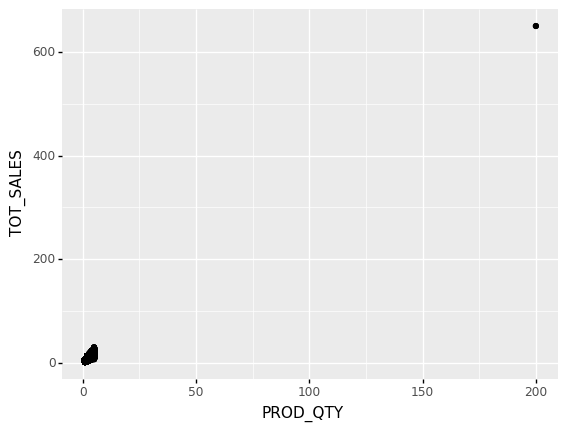

<ggplot: (157632060197)>

In [266]:
#dot graph to see any outliers or patterns
ggplot(transactionData, aes(x = 'PROD_QTY', y = 'TOT_SALES')) + geom_point()

In [267]:
#found outliers from ggplot. now find those outliers.

transactionData[transactionData.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [268]:
#identify the purchase history of the same customer

transactionData[-(transactionData.LYLTY_CARD_NBR == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [269]:
#remove outlier customer information out of our data

transactionData = transactionData[-(transactionData.LYLTY_CARD_NBR == 226000)]

In [270]:
#proof of 226000 customer got rid of.

transactionData[(transactionData.LYLTY_CARD_NBR == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [271]:
#count all transacdtions by dates
a = transactionData.groupby('DATE').count()
a

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,724,724,724,724,724,724,724
2018-07-02,711,711,711,711,711,711,711
2018-07-03,722,722,722,722,722,722,722
2018-07-04,714,714,714,714,714,714,714
2018-07-05,712,712,712,712,712,712,712
...,...,...,...,...,...,...,...
2019-06-26,723,723,723,723,723,723,723
2019-06-27,709,709,709,709,709,709,709
2019-06-28,730,730,730,730,730,730,730


In [272]:
#find missing dates
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(a.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [273]:
#add missing date and values to the row
a.loc['2018-12-25'] = 0

In [274]:
#move back 'DATE' index back to data set and sort by Date.
a = a.reset_index().sort_values('DATE')

In [275]:
#check if DATE label is returned to a variable
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 363
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            365 non-null    datetime64[ns]
 1   STORE_NBR       365 non-null    int64         
 2   LYLTY_CARD_NBR  365 non-null    int64         
 3   TXN_ID          365 non-null    int64         
 4   PROD_NBR        365 non-null    int64         
 5   PROD_NAME       365 non-null    int64         
 6   PROD_QTY        365 non-null    int64         
 7   TOT_SALES       365 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 25.7 KB


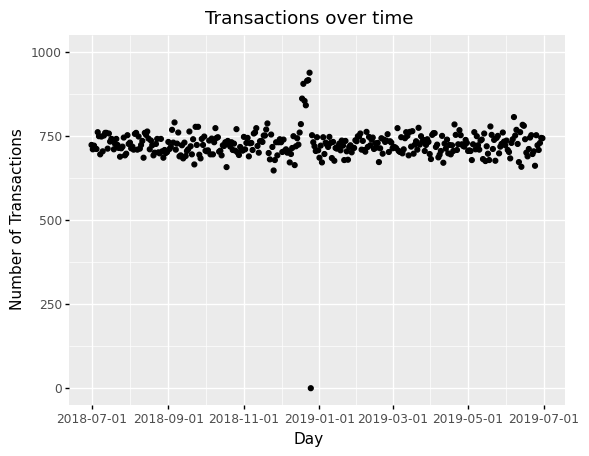

<ggplot: (157635291736)>

In [276]:
#show transactions per month graph
(
    ggplot(a)
    + aes(x = 'DATE', y = 'TOT_SALES')
    + geom_point()
    + labs(x = "Day", y = "Number of Transactions", title = "Transactions over time")
    + ylim(0, 1000)
    #+ ylim()
    #+ scale_x_date(breaks = '1 month', labels = '%d')
)

C:\Users\jang\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 334 rows containing missing values.


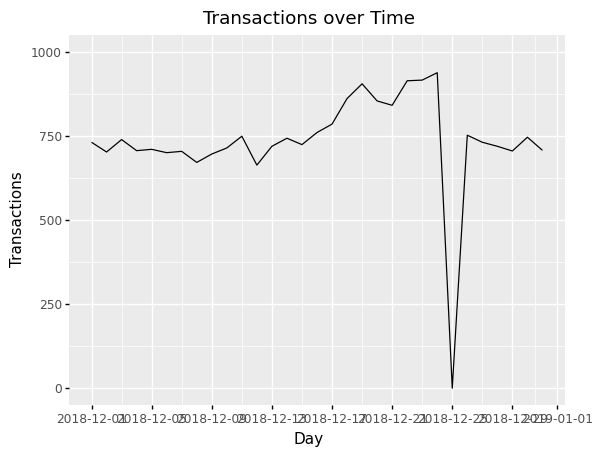

<ggplot: (157632338616)>

In [277]:
#look closer between dec 01 - dec 31
(
    ggplot(a)
    + aes(x = 'DATE', y = 'TOT_SALES')
    + geom_line()
    + labs(x = "Day", y = "Transactions", title = "Transactions over Time")
    + ylim(0, 1000)
    #+ xlim('2018-12-01', '2018-12-31')
    + scale_x_date(limits = ('2018-12-01', '2018-12-31'))
)

In [283]:
#extract product weight from PROD_NAME
transactionData["PACK_SIZE"] = transactionData.PROD_NAME.str.extract(r'([0-9]+[gG])')[0].str.replace("[gG]", "").astype("int64")

<ipython-input-283-1307e79f7e8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [285]:
transactionData.PACK_SIZE.head(10)

0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: PACK_SIZE, Length: 264834, dtype: int64

In [247]:
#try to create Weight variable much faster

#transactionData.Weight = transactionData.PROD_NAME.str.extract(pat = r'[0-9][0-9][0-9][gG]')
#splitted = transactionData.PROD_NAME.str.split(" ")
#takes way too long time to run. need better suggestion.
#create Weight variable by dividing product name and the weight from PROD_NAME

#    transactionData.PACK_SIZE = splitted[i][len(splitted[i]) - 1]

C:\Users\jang\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 399'. Pick better value with 'binwidth'.


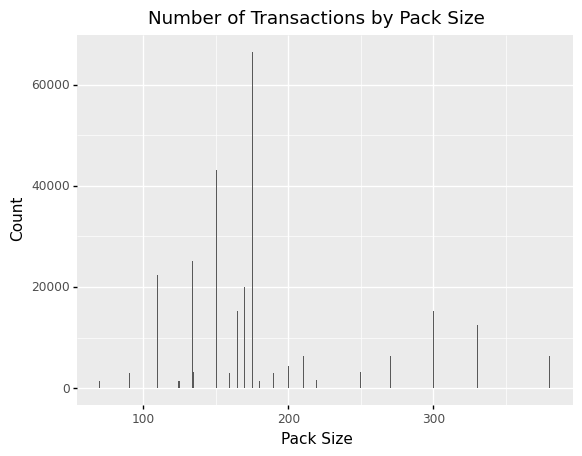

<ggplot: (157623336461)>

In [287]:
(
    ggplot(transactionData)
    + aes(x = 'PACK_SIZE')
    + geom_histogram()
    + labs(x = "Pack Size", y = "Count", title = "Number of Transactions by Pack Size")
    
)